# How to plot spatial gene expression estimates created with the splotch DE workflow?



Load libraries

In [1]:
from __future__ import absolute_import, division, print_function
import os
import re
import glob
import numpy
import matplotlib
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import math
import seaborn as sns
from PIL import Image
Image.MAX_IMAGE_PIXELS = 1000000000

%matplotlib inline
matplotlib.rcParams.update({'axes.linewidth': 0.25,
                            'xtick.major.size': 2,
                            'xtick.major.width': 0.25,
                            'ytick.major.size': 2,
                            'ytick.major.width': 0.25,
                            'pdf.fonttype': 42,
                            'font.sans-serif': 'Arial'})

In [2]:
# raw data files needed to run are available at SCP: https://singlecell.broadinstitute.org/single_cell/study/SCP979/
# please download: lambdas_pmeans_visium.tsv, coordinate_registration_visium.p, information_visium.p

Load definitions

In [2]:
def read_array_metadata(metadata,filename,n_levels, extraplot=None):
    array_metadata = metadata[metadata['Count file'] == filename]
    array_levels = [array_metadata['Level %d'%(idx+1)].values[0] for idx in range(0,n_levels)]
    
    if extraplot != None:
        array_levels = array_metadata['Extra_plot_level'].tolist()
    return array_levels

def Extract(lst): 
    return list(next(zip(*lst))) 

def rename_lambdas_index(lambdas_file): 
    nwe=[]
    nm=lambdas_file.index
    for item in nm:
        nwe.append(str(item).split("_")[0])
    return nwe

In [3]:
# Load Lambda pmean df

path = '../../smomics_data/'

# Read file
filename = os.path.join(path, 'lambdas_pmeans_visium.tsv')
lambda_posterior_means = pd.read_csv(filename, index_col=0, sep='\t', header=[0,1],low_memory=False)
lambda_posterior_means.index = rename_lambdas_index(lambda_posterior_means)


In [4]:
lambda_posterior_means.head()

file          /ahg/regevdata/projects/splotch_spatial_transcriptomics/outputs/splotch/Visium/output/Count_Tables/visium_B1_stdata_adjusted.tsv  \
coordinate                                                                                                                                43_3   
0610007P14Rik                                -0.5676301775349999                                                                                 
0610009B22Rik                                -0.5805055870000007                                                                                 
0610009E02Rik                                -4.1315722500000005                                                                                 
0610009L18Rik                                       -2.796178055                                                                                 
0610009O20Rik                                 -2.675519294999999                                                                                 

file                                                                          \
coordinate                   19_59                 9_43                13_47   
0610007P14Rik  -0.4260255076500002        -0.4266483044  -0.4155765882500002   
0610009B22Rik  -0.5126569563650001  -0.5139419282499998  -0.6520877529999999   
0610009E02Rik           -4.1139759  -4.1039243999999995   -3.194059834999998   
0610009L18Rik   -2.502462874999998  -2.5053857449999986   -1.971164054999999   
0610009O20Rik   -2.652781149999999  -2.7865325699999994   -2.662592350000001   

file                                                       \
coordinate                    28_42                 42_52   
0610007P14Rik  -0.02362618300000002  -0.40131568919999977   
0610009B22Rik  -0.32138071749999997  -0.31962801750000014   
0610009E02Rik    -4.415270500000001    -4.685711900000001   
0610009L18Rik   -2.7358387450000015   -2.6674004350000007   
0610009O20Rik   -2.0972039399999995   -2.6795529600000014   

file                                                      \
coordinate                   83_65                 19_37   
0610007P14Rik  -0.2975547070500002  -0.39160510329999987   
0610009B22Rik       -0.24921922353  -0.48241359864999994   
0610009E02Rik   -4.671912550000001    -4.502286050000002   
0610009L18Rik  -2.8032126500000003   -2.7693654600000004   
0610009O20Rik          -2.86526675   -2.7707976549999995   

file                                                       ...  \
coordinate                     64_6                  4_58  ...   
0610007P14Rik  -0.46663696264999965  -0.39714840660999967  ...   
0610009B22Rik   -0.4456156302499998   -0.6755760834999998  ...   
0610009E02Rik    -5.226284349999999           -4.42307345  ...   
0610009L18Rik    -2.154049867000001   -2.1961866199999984  ...   
0610009O20Rik   -2.1348433550000006   -2.7802479500000006  ...   

file          /ahg/regevdata/projects/splotch_spatial_transcriptomics/outputs/splotch/Visium/output/Count_Tables/visium_A1_stdata_adjusted.tsv  \
coordinate                                                                                                                               95_63   
0610007P14Rik                                -0.4594314071999998                                                                                 
0610009B22Rik                               -0.30134854270000017                                                                                 
0610009E02Rik                                 -4.497049350000001                                                                                 
0610009L18Rik                                      -2.5840362625                                                                                 
0610009O20Rik                                -2.7526513850000005                                                                                 

file                                                      \
coordinate           

In [5]:
# Load coordinates registration file
reg_file = os.path.join(path, 'coordinate_registration_visium.p')
registered_coordinates_dict = pickle.load(open(reg_file,'rb'), encoding='bytes') 


In [6]:
# Load sample_information file
info_file = os.path.join(path, 'information_visium.p')
info = pickle.load(open(info_file,'rb'))   
metadata = info['metadata']
n_levels = info['n_levels']


In [7]:
# Take exp()
lambda_posterior_means = lambda_posterior_means.astype(float)
lambda_posterior_means = numpy.exp(lambda_posterior_means-1)

## Plot a single gene across all different spatial arrays

In [290]:
# Pick a gene:
gene = 'Mbp'

assert gene in lambda_posterior_means.index, 'Error: %s not found!'%(gene)

# Pick variables to compare
variables_of_interest = ['M1']

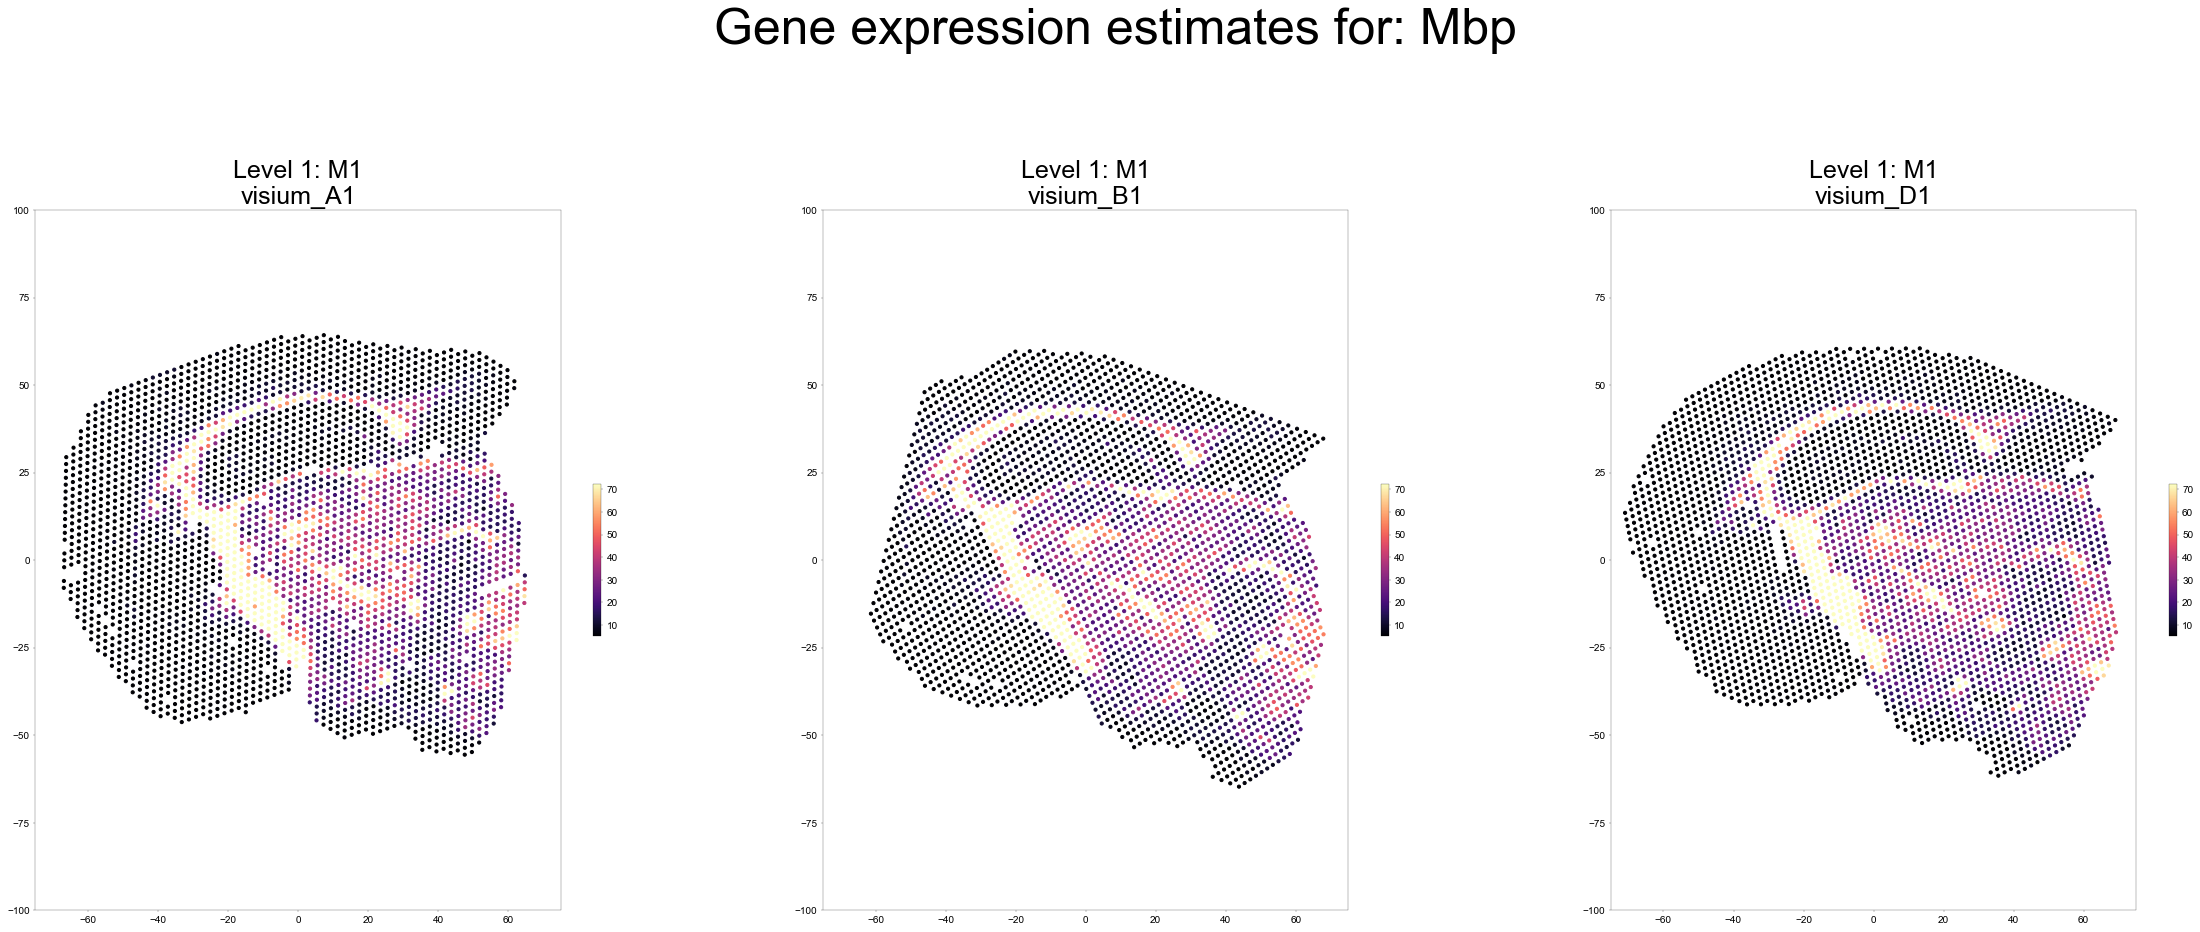

In [297]:
# initialize a figure
fig = matplotlib.pyplot.figure(figsize=(40, 30))

num_cols = 3
# get the names of the count files
count_files = numpy.array(list(lambda_posterior_means.columns.levels[0]))

axes = []
for j in range(0, num_cols):
    ax = plt.subplot2grid((int(len(count_files)/num_cols+1), num_cols), (0, j))
    axes.append(ax) 

# use the same color scale across the arrays
vmin,vmax = 5,numpy.percentile(lambda_posterior_means.loc[gene].values,95)

fig.suptitle("Gene expression estimates for: " + gene, fontsize=50)

# loop over the count files
for n,count_file in enumerate(count_files):
    ax = axes[n]

    coordinates = []
    for coord_idx,coordinate in enumerate(list(lambda_posterior_means[count_file].columns)):
        if coordinate in registered_coordinates_dict[count_file]:
            
            coordinates.append(list(map(float,registered_coordinates_dict[count_file][coordinate].split('_'))))
    coordinates = numpy.array(coordinates) 
    
    x_coordinates = coordinates[:,0]
    y_coordinates = coordinates[:,1]
    
    # rotation specific for Visium samples
    if n ==1:
        x_coor_rot = max(x_coordinates)-x_coordinates+min(x_coordinates)
        alpha = 20
        x_coor_rot2 = math.cos(math.radians(alpha))* x_coor_rot-math.sin(math.radians(alpha))*y_coordinates
        y_coor_rot = math.sin(math.radians(alpha))* x_coor_rot+math.cos(math.radians(0.3*alpha))*y_coordinates
        y_coor_rot = y_coor_rot*1.5
        x_coor_rot2 = x_coor_rot2*1.3
    if n ==2:
        x_coor_rot = max(x_coordinates)-x_coordinates+min(x_coordinates)
        alpha = 15
        x_coor_rot2 = math.cos(math.radians(alpha))* x_coor_rot-math.sin(math.radians(alpha))*y_coordinates
        y_coor_rot = math.sin(math.radians(2*alpha))* x_coor_rot+math.cos(math.radians(2*alpha))*y_coordinates
        y_coor_rot = y_coor_rot*1.5
        x_coor_rot2 = x_coor_rot2*1.3       
    if n ==0:
        x_coor_rot = x_coordinates*2
        alpha = 40
        x_coor_rot2 = math.cos(math.radians(1.05*alpha))* x_coor_rot-math.sin(math.radians(1.05*alpha))*y_coordinates
        y_coor_rot = math.sin(math.radians(0))* x_coor_rot+math.cos(math.radians(0))*y_coordinates
        alpha = 10
        x_coor_rot2 = math.cos(math.radians(alpha))* x_coor_rot2-math.sin(math.radians(alpha))*y_coor_rot
        y_coor_rot = math.sin(math.radians(alpha))* x_coor_rot2+math.cos(math.radians(alpha))*y_coor_rot
        y_coor_rot = y_coor_rot*1.15 + 10
        x_coor_rot2 = x_coor_rot2*1.2 + 15
       
    s = 10
    ax.set_xlim(-75,75)
    ax.set_ylim(-100,100)
        
    cbmap = ax.scatter(x_coor_rot2,y_coor_rot,
                       s=s,c=lambda_posterior_means[count_file].loc[gene],
                       cmap='magma',vmin=vmin,vmax=vmax,marker='o')
    
    ax.set_aspect('equal')
    
    #ax.set_xticks([])
    #ax.set_yticks([])
    
    
        # put some information on the array in the title
    ax.set_title('%s\n%s'%(
                '\n'.join(['Level %d: %s'%(level_idx+1,level)
                       for level_idx,level in enumerate(list(map(str,read_array_metadata(metadata,count_file,n_levels))))]),count_file.split('/')[-1].split("_stdata_adjusted.tsv")[0]), fontsize=25)
    
    cbar = matplotlib.pyplot.colorbar(cbmap,ax=ax,shrink=0.2)
    cbar.ax.tick_params(labelsize=10) 
        
fig.subplots_adjust(top=0.90)

## View multiple genes at once in a CCF system

In [293]:
# Pick genes:
genes = ['Nxph4','Doc2a', 'Slc18a2', 'Cabp7','Ptpn4','Scn5a', 'Dkkl1', 'Mbp']

for gene in genes:
    assert gene in lambda_posterior_means.index, 'Error: %s not found!'%(gene)

# Pick variables to compare
variables_of_interest = ['M1']
naming_dict = {'M1':'Cortex DAPI samples, splotch_one_level'}

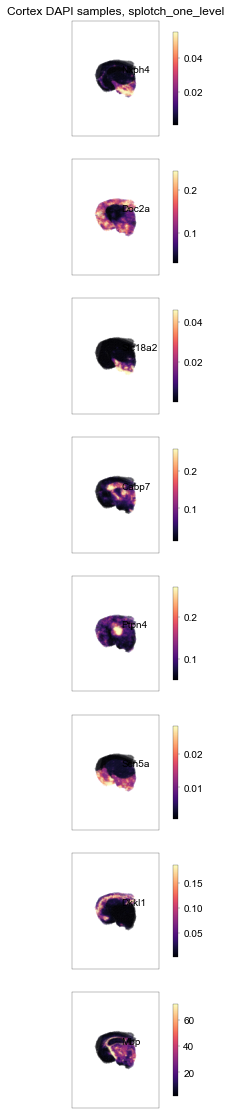

In [298]:
# initialize a figure
fig = matplotlib.pyplot.figure()
fig.set_size_inches([len(variables_of_interest)*5,20])

axes = []
for i in range(len(genes)):
    for ax_idx in range(len(variables_of_interest)):
        ax = plt.subplot2grid((len(genes), len(variables_of_interest)), (i, ax_idx))
        axes.append(ax)                    

for gidx, gene in enumerate(genes):
    
    # get the names of the count files
    count_files = numpy.array(list(lambda_posterior_means.columns.levels[0]))
    
    #count_files = count_files[0:2]

    # use the same color scale across the arrays
    #vmin,vmax = 0,numpy.percentile(lambda_posterior_means.loc[gene].values,95)
    vmin = numpy.percentile(lambda_posterior_means.loc[gene].values,5)
    vmax = numpy.percentile(lambda_posterior_means.loc[gene].values,95)
    
    # adjust the axes
    for ax_idx in range(0,len(variables_of_interest)):
        
        if gidx == 0:
            axes[ax_idx +(gidx*len(variables_of_interest))].set_title(naming_dict[variables_of_interest[ax_idx]])
    
        axes[ax_idx +(gidx*len(variables_of_interest))].set_aspect('equal')
    
        axes[ax_idx +(gidx*len(variables_of_interest))].set_xticks([])
        axes[ax_idx +(gidx*len(variables_of_interest))].set_yticks([])
    
        axes[ax_idx +(gidx*len(variables_of_interest))].set_xlim([-150,150])
        axes[ax_idx +(gidx*len(variables_of_interest))].set_ylim([-200,200])

    cbmap = [None for _ in range(0,len(variables_of_interest))]
    
    # loop over the count files
    for n,count_file in enumerate(count_files):
    
        # see if the current array has the level variable of interest
        try:
            #ax_idx = variables_of_interest.index(read_array_metadata(metadata,count_file,n_levels)[0])
            ax_idx = variables_of_interest.index(read_array_metadata(metadata,count_file,n_levels)[0])
        except ValueError:
            continue
        
        # move to the next array if the current array has not been registered 
        if count_file not in registered_coordinates_dict:
            continue
    
        # for each ST spot on the array, let us get its registered coordinate if available
        coordinates_found = numpy.zeros(len(list(lambda_posterior_means[count_file].columns))) # indicator of being registered
        coordinates = []  
        for coord_idx,coordinate in enumerate(list(lambda_posterior_means[count_file].columns)):
            if coordinate in registered_coordinates_dict[count_file]:
                coordinates_found[coord_idx] = 1
                coordinates.append(list(map(float,registered_coordinates_dict[count_file][coordinate].split('_'))))
        coordinates = numpy.array(coordinates)
        
        x_coordinates = coordinates[:,0]
        y_coordinates = coordinates[:,1]
        
        if n ==1:
            x_coor_rot = max(x_coordinates)-x_coordinates+min(x_coordinates)
            alpha = 20
            x_coor_rot2 = math.cos(math.radians(alpha))* x_coor_rot-math.sin(math.radians(alpha))*y_coordinates
            y_coor_rot = math.sin(math.radians(alpha))* x_coor_rot+math.cos(math.radians(0.3*alpha))*y_coordinates
            y_coor_rot = y_coor_rot*1.5
            x_coor_rot2 = x_coor_rot2*1.3
        if n ==2:
            x_coor_rot = max(x_coordinates)-x_coordinates+min(x_coordinates)
            alpha = 15
            x_coor_rot2 = math.cos(math.radians(alpha))* x_coor_rot-math.sin(math.radians(alpha))*y_coordinates
            y_coor_rot = math.sin(math.radians(2*alpha))* x_coor_rot+math.cos(math.radians(2*alpha))*y_coordinates
            y_coor_rot = y_coor_rot*1.5
            x_coor_rot2 = x_coor_rot2*1.3       
        if n ==0:
            x_coor_rot = x_coordinates*2
            alpha = 40
            x_coor_rot2 = math.cos(math.radians(1.05*alpha))* x_coor_rot-math.sin(math.radians(1.05*alpha))*y_coordinates
            y_coor_rot = math.sin(math.radians(0))* x_coor_rot+math.cos(math.radians(0))*y_coordinates
            alpha = 10
            x_coor_rot2 = math.cos(math.radians(alpha))* x_coor_rot2-math.sin(math.radians(alpha))*y_coor_rot
            y_coor_rot = math.sin(math.radians(alpha))* x_coor_rot2+math.cos(math.radians(alpha))*y_coor_rot
            y_coor_rot = y_coor_rot*1.15 + 10
            x_coor_rot2 = x_coor_rot2*1.2 + 15

       
        # visualize the registered ST spots
        cbmap[ax_idx] = axes[ax_idx +(gidx*len(variables_of_interest))].scatter(x_coor_rot2,y_coor_rot,
                               s=0.01, c=lambda_posterior_means[count_file].loc[gene][coordinates_found > 0],
                               cmap='magma',vmin=vmin,vmax=vmax,marker='o',alpha=0.9)

    # add colorbars
    for ax_idx in range(0, len(variables_of_interest)):
        if cbmap[ax_idx] is not None:
            cbar = matplotlib.pyplot.colorbar(cbmap[ax_idx],ax=axes[ax_idx +(gidx*len(variables_of_interest))],shrink=0.8)    
            #cbar.set_label(r'%s $\bar{\lambda}$'%(gene))
    
    # Set gene name
    uu = 0
    axes[uu +(gidx*len(variables_of_interest))].text(20, 20, gene, fontsize=10)


# Plot individually sections

In [311]:
# Pick genes:
regions = ['CTXSP', 'HIP', 'HY', 'ISOCORTEX', 'TH','PIR']  
genes = ['Adora2a', 'Cabp7','Slc6a11', 'Ier5', 'Slc17a6', 'Grem2']

# Pick variables to compare
variables_of_interest = ['M1']

In [312]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [313]:
aba_path = '/Users/svickovi/Desktop/splotch/jpg_he'
ABA_HE = [aba_path + '/' + genes[0] + '.jpg',
         aba_path + '/' + genes[1] + '.jpg',
         aba_path + '/' + genes[2] + '.jpg',
         aba_path + '/' + genes[3] + '.jpg',
         aba_path + '/' + genes[4] + '.jpg',
         aba_path + '/' + genes[5] + '.jpg',]
         #aba_path + '/' + genes[6] + '.jpg']


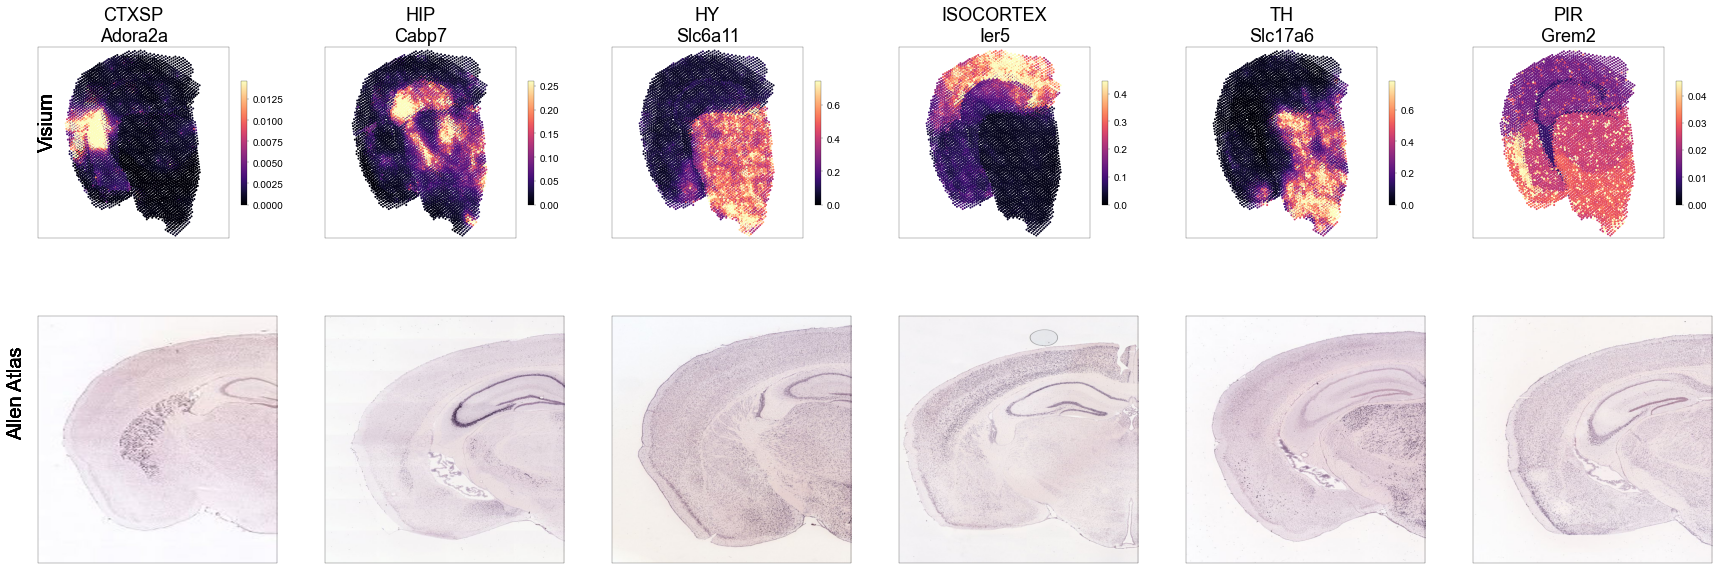

In [319]:
## Same, but one gene in each figure, ie. no subplots

# initialize a figure
fig = plt.figure(figsize=(30, 10))

axes = []
for ax_idx in range(0,2):
    for i in range(len(genes)):
        ax = plt.subplot2grid((2, len(genes)), (ax_idx, i))
        axes.append(ax)                    


############# SPLOTCH ############# 
for gidx, gene in enumerate(genes):
    
    # get the names of the count files
    count_files = numpy.array(list(lambda_posterior_means.columns.levels[0]))

    # use the same color scale across the arrays
    vmin,vmax = 0,numpy.percentile(lambda_posterior_means.loc[gene].values,95)
           
    
    axes[gidx].set_aspect('equal')
    
    axes[gidx].set_xticks([])
    axes[gidx].set_yticks([])
    
    axes[gidx].set_xlim([-100,100])
    axes[gidx].set_ylim([-100,100])

    cbmap = [None for _ in range(0,len(genes))]
    
    # loop over the count files
    for n,count_file in enumerate(count_files):
    
        # see if the current array has the level variable of interest
        try:
            #ax_idx = variables_of_interest.index(read_array_metadata(metadata,count_file,n_levels)[0])
            ax_idx = variables_of_interest.index(read_array_metadata(metadata,count_file,n_levels)[0])
        except ValueError:
            continue
        
        # move to the next array if the current array has not been registered 
        if count_file not in registered_coordinates_dict:
            continue
    
        # for each ST spot on the array, let us get its registered coordinate if available
        coordinates_found = numpy.zeros(len(list(lambda_posterior_means[count_file].columns))) # indicator of being registered
        coordinates = []  
        for coord_idx,coordinate in enumerate(list(lambda_posterior_means[count_file].columns)):
            if coordinate in registered_coordinates_dict[count_file]:
                coordinates_found[coord_idx] = 1
                coordinates.append(list(map(float,registered_coordinates_dict[count_file][coordinate].split('_'))))
        coordinates = numpy.array(coordinates)
        x_coordinates = coordinates[:,0]
        y_coordinates = coordinates[:,1]

        ##  Rotation specific for DAPI 9 sections dataset
        if n ==1:
            x_coor_rot = max(x_coordinates)-x_coordinates+min(x_coordinates)
            alpha = 20
            x_coor_rot2 = math.cos(math.radians(alpha))* x_coor_rot-math.sin(math.radians(alpha))*y_coordinates
            y_coor_rot = math.sin(math.radians(alpha))* x_coor_rot+math.cos(math.radians(0.3*alpha))*y_coordinates
            y_coor_rot = y_coor_rot*1.5
            x_coor_rot2 = x_coor_rot2*1.3
        if n ==2:
            x_coor_rot = max(x_coordinates)-x_coordinates+min(x_coordinates)
            alpha = 15
            x_coor_rot2 = math.cos(math.radians(alpha))* x_coor_rot-math.sin(math.radians(alpha))*y_coordinates
            y_coor_rot = math.sin(math.radians(2*alpha))* x_coor_rot+math.cos(math.radians(2*alpha))*y_coordinates
            y_coor_rot = y_coor_rot*1.5
            x_coor_rot2 = x_coor_rot2*1.3       
        if n ==0:
            x_coor_rot = x_coordinates*2
            alpha = 40
            x_coor_rot2 = math.cos(math.radians(1.05*alpha))* x_coor_rot-math.sin(math.radians(1.05*alpha))*y_coordinates
            y_coor_rot = math.sin(math.radians(0))* x_coor_rot+math.cos(math.radians(0))*y_coordinates
            alpha = 10
            x_coor_rot2 = math.cos(math.radians(alpha))* x_coor_rot2-math.sin(math.radians(alpha))*y_coor_rot
            y_coor_rot = math.sin(math.radians(alpha))* x_coor_rot2+math.cos(math.radians(alpha))*y_coor_rot
            y_coor_rot = y_coor_rot*1.15 + 10
            x_coor_rot2 = x_coor_rot2*1.2 + 15

        # visualize the registered ST spots
        cbmap[gidx] = axes[gidx].scatter(x_coor_rot2,y_coor_rot*1.5,
                               s=1, c=lambda_posterior_means[count_file].loc[gene][coordinates_found > 0],
                               cmap='magma',vmin=vmin,vmax=vmax,marker='o')

    # add colorbars
    for ax_idx in range(0, len(genes)):
        if cbmap[ax_idx] is not None:
            cbar = matplotlib.pyplot.colorbar(cbmap[ax_idx],ax=axes[gidx],shrink=0.5)    
            #cbar.set_label(r'%s $\bar{\lambda}$'%(gene))
     
    # Set sub labels
    axes[0].text(-100, -5, 'Visium', fontsize=20,  rotation=90)
    
    # Set gene name
    uu =0
    axes[gidx].set_title(regions[gidx] + '\n' + gene, fontsize=18)
    
############# ABA expression ############# 

for j, genej in enumerate(genes):
    
    # read the tissue image
    tissue_image = Image.open(ABA_HE[j])
    tissue_image = matplotlib.pyplot.imread(ABA_HE[j])
    # take only half 
        
    # visualize the tissue image
    axes[j+len(genes)].imshow(tissue_image[:,0:round(numpy.size(tissue_image,0)/2)+100])
    #axes[j+7].imshow(tissue_image)
    axes[j+len(genes)].set_aspect('auto')
    
    axes[j+len(genes)].set_xticks([])
    axes[j+len(genes)].set_yticks([])
    
    # Set sublabels
    axes[len(genes)].text(-80, 500, 'Allen Atlas', fontsize=20,  rotation=90)
    
#plt.tight_layout()
#plt.show()
plt.savefig('../../figures/Visium_mrna_splotch.pdf')#,bbox_inches = 'tight',
   #pad_inches = 0, dpi=1200)#, rasterized=Truetransparent=True, 
